In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Import files
sales = pd.read_csv("sales.csv")
prices = pd.read_csv("prices.csv")

In [6]:
#Update datetime
sales["ordered_at"] = pd.to_datetime(sales["ordered_at"])
prices["updated_at"] = pd.to_datetime(prices["updated_at"])

In [7]:
#Rename column sales
updated_sales = sales.rename(columns ={'ordered_at':'date'})
updated_sales.date = pd.to_datetime(updated_sales.date)
sort_sales = updated_sales.sort_values('date')

In [8]:
#Rename column prices
updated_prices = prices.rename(columns ={'updated_at':'date'})
updated_prices.date = pd.to_datetime(updated_prices.date)
sort_prices = updated_prices.sort_values('date')

In [9]:
old_prices = sort_prices[['product_id','old_price','date']].rename(columns = {'old_price':'price'})
old_prices

,product_id,price,date
4,3954203,68800,2018-09-10 16:32:00
7,3998909,19000,2018-09-10 16:35:00
0,64,270000,2018-09-10 16:37:00
11,4085861,60000,2018-09-11 08:51:00
1,3954203,60000,2018-09-11 11:54:00
9,4085861,53500,2018-09-12 03:51:00
6,3998909,17000,2018-09-13 06:43:00
13,4085861,67000,2018-09-13 06:43:00
3,3954203,64000,2018-09-15 03:49:00
12,4085861,62500,2018-09-15 03:51:00


In [10]:
new_prices = sort_prices[['product_id','new_price','date']].rename(columns = {'new_price':'price'})
print(new_prices)

    product_id   price                date
4      3954203   60000 2018-09-10 16:32:00
7      3998909   17000 2018-09-10 16:35:00
0           64  239000 2018-09-10 16:37:00
11     4085861   53500 2018-09-11 08:51:00
1      3954203   64000 2018-09-11 11:54:00
9      4085861   67000 2018-09-12 03:51:00
6      3998909   15500 2018-09-13 06:43:00
13     4085861   62500 2018-09-13 06:43:00
3      3954203   60500 2018-09-15 03:49:00
12     4085861   58000 2018-09-15 03:51:00
5      3998909   16500 2018-09-16 05:09:00
10     4085861   53500 2018-09-17 03:35:00
2      3954203   57500 2018-09-17 22:59:00
8      4085861   52000 2018-09-17 22:59:00


In [11]:
#merge sales prices on new price
sale_price = pd.merge_asof(sort_sales, new_prices, on = 'date', by = 'product_id')
sale_price_new = sale_price.dropna()
sale_price_new

,product_id,date,quantity_ordered,price
0,3954203,2018-09-11 01:43:00,1,60000.0
4,4085861,2018-09-11 09:30:00,1,53500.0
5,4085861,2018-09-11 11:06:00,1,53500.0
6,3954203,2018-09-11 11:11:00,1,60000.0
7,3954203,2018-09-11 11:11:00,1,60000.0
...,...,...,...,...
170,4085861,2018-09-18 20:23:00,1,52000.0
171,4085861,2018-09-18 20:43:00,1,52000.0
172,4085861,2018-09-18 20:54:00,1,52000.0
173,3954203,2018-09-18 21:26:00,1,57500.0


In [12]:
#Drop NaN 
sale_price_updated = sale_price.query('price != price').drop(columns=['price'])
sale_price_updated

,product_id,date,quantity_ordered
1,4085861,2018-09-11 06:26:00,1
2,4085861,2018-09-11 06:53:00,1
3,4085861,2018-09-11 08:24:00,1


In [13]:
#merge sales prices on old price
sale_price_old = pd.merge_asof(sale_price_updated, old_prices, on = 'date', by = 'product_id', direction = 'forward')
sale_price_old

,product_id,date,quantity_ordered,price
0,4085861,2018-09-11 06:26:00,1,60000
1,4085861,2018-09-11 06:53:00,1,60000
2,4085861,2018-09-11 08:24:00,1,60000


In [14]:
#Calculate total revenue
sale_price = pd.concat([sale_price_new, sale_price_old])
sale_price['total_revenue'] = sale_price['quantity_ordered'] * sale_price['price']
sale_price

,product_id,date,quantity_ordered,price,total_revenue
0,3954203,2018-09-11 01:43:00,1,60000.0,60000.0
4,4085861,2018-09-11 09:30:00,1,53500.0,53500.0
5,4085861,2018-09-11 11:06:00,1,53500.0,53500.0
6,3954203,2018-09-11 11:11:00,1,60000.0,60000.0
7,3954203,2018-09-11 11:11:00,1,60000.0,60000.0
...,...,...,...,...,...
173,3954203,2018-09-18 21:26:00,1,57500.0,57500.0
174,3998909,2018-09-18 22:11:00,1,16500.0,16500.0
0,4085861,2018-09-11 06:26:00,1,60000.0,60000.0
1,4085861,2018-09-11 06:53:00,1,60000.0,60000.0


In [15]:
#Revenue by products
product_revenue = sale_price.groupby('product_id')[['total_revenue']].sum()
product_revenue

,total_revenue
product_id,
64,956000.0
3954203,877500.0
3998909,280500.0
4085861,8247500.0


In [16]:
revenue = sum(product_revenue['total_revenue'])
revenue

10361500.0

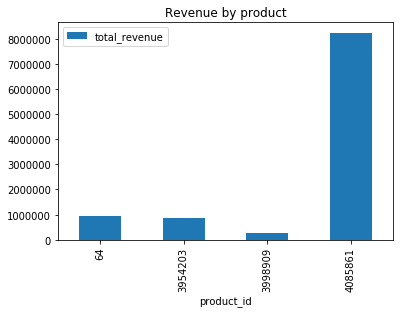

In [14]:
product_revenue.plot(kind = 'bar', title = 'Revenue by product')